In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
df=pd.read_csv('Desktop/pandas Demo/task3/mymoviedb.csv', lineterminator='\n')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.dtypes.to_frame()

,0
Release_Date,object
Title,object
Overview,object
Popularity,float64
Vote_Count,int64
Vote_Average,float64
Original_Language,object
Genre,object
Poster_Url,object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
total= df.isnull().sum().sort_values(ascending= False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending= False)
missing_data=pd.concat([total,percent],axis=1,keys=['TOTAL','PERCENT'])
missing_data

,TOTAL,PERCENT
Release_Date,0,0.0
Title,0,0.0
Overview,0,0.0
Popularity,0,0.0
Vote_Count,0,0.0
Vote_Average,0,0.0
Original_Language,0,0.0
Genre,0,0.0
Poster_Url,0,0.0


## data has no missing values 

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


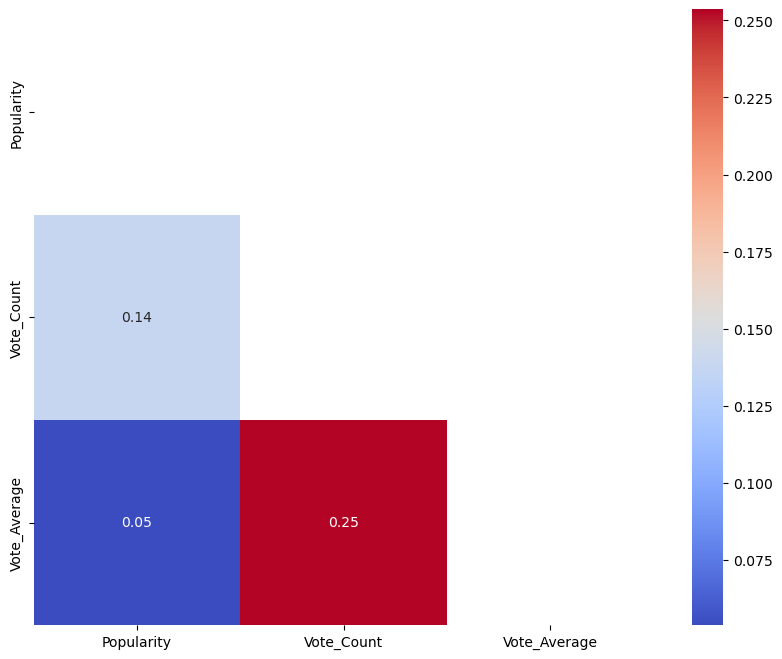

In [8]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

matrix = np.triu(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=matrix)
plt.show()


In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df.sort_values(by='Release_Date',inplace=True)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
6084,1902-04-17,A Trip to the Moon,Professor Barbenfouillis and five of his colle...,18.356,1284,8.0,fr,"Adventure, Fantasy, Science Fiction",https://image.tmdb.org/t/p/original/9o0v5LLFk5...
6336,1920-02-27,The Cabinet of Dr. Caligari,"Francis, a young man, recalls in his memory th...",17.858,1075,8.0,de,"Drama, Horror, Thriller, Crime",https://image.tmdb.org/t/p/original/myK9DeIsXW...
7903,1921-01-01,The Phantom Carriage,It's New Year's Eve. Three drunkards evoke a l...,15.371,213,7.9,sv,"Drama, Fantasy, Horror",https://image.tmdb.org/t/p/original/yGNekNFaI4...
8789,1921-01-21,The Kid,A tramp cares for a boy after he's abandoned a...,14.338,1528,8.2,en,"Comedy, Drama",https://image.tmdb.org/t/p/original/drgMcyTsyS...
3219,1922-02-16,Nosferatu,Vampire Count Orlok is interested in a new res...,28.638,1406,7.7,de,"Fantasy, Horror",https://image.tmdb.org/t/p/original/zx24O7VAs6...


In [10]:
sns.set_style("darkgrid")
sns.set_palette("RdYlBu")

In [11]:
df['Genre'] = df['Genre'].str.split(',').str[0]
df['Genre'].value_counts()

Genre
Drama              1791
Action             1570
Comedy             1484
Horror              868
Animation           805
Adventure           586
Thriller            515
Crime               391
Family              350
Romance             304
Science Fiction     296
Fantasy             254
Documentary         184
Mystery             102
War                  89
Music                82
Western              73
History              45
TV Movie             38
Name: count, dtype: int64

In [12]:
df['Genre'].unique()

array(['Adventure', 'Drama', 'Comedy', 'Fantasy', 'Documentary', 'Action',
       'Horror', 'Music', 'Animation', 'Mystery', 'Crime', 'Western',
       'War', 'Thriller', 'Family', 'Romance', 'Science Fiction',
       'History', 'TV Movie'], dtype=object)

## Representation of the most common genre of moives
### here we can see that the most common genre is Drama 
#### while Action and Comedy moives are not far apart 

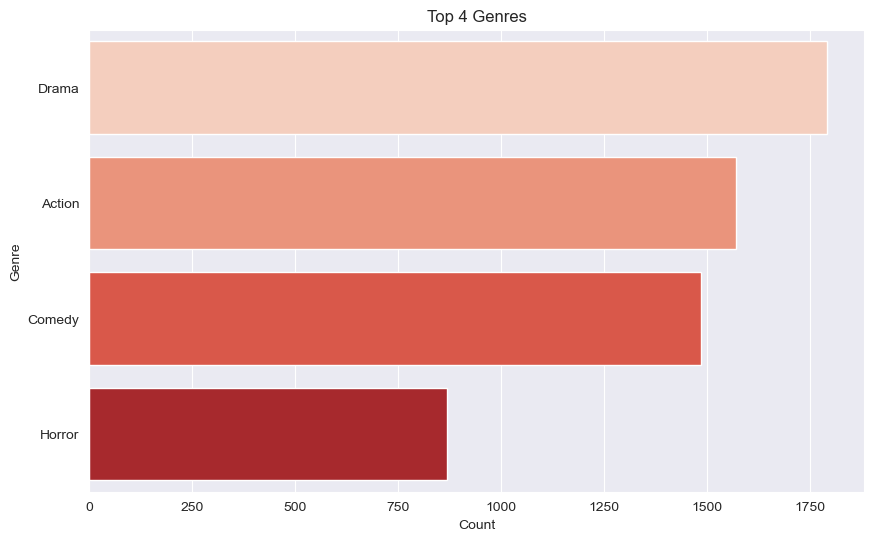

In [13]:
genre_counts = df['Genre'].value_counts()
top_4_genres = genre_counts.head(4)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_4_genres.values, y=top_4_genres.index,palette='Reds')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 4 Genres')
plt.show()

In [14]:
genre_counts

Genre
Drama              1791
Action             1570
Comedy             1484
Horror              868
Animation           805
Adventure           586
Thriller            515
Crime               391
Family              350
Romance             304
Science Fiction     296
Fantasy             254
Documentary         184
Mystery             102
War                  89
Music                82
Western              73
History              45
TV Movie             38
Name: count, dtype: int64

## plotting the top 10 most highest rated moives
## its moives with ratings (avarage ratings of 8.5 and above)
### as we see knug fu master got a perfect rating of 10 while the rest of moives got on avarage a 9ish score and close to each other 



C:\Users\alyah\AppData\Local\Temp\ipykernel_26276\3237197287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_ratings_df.sort_values(by='Vote_Average',ascending=False,inplace=True)


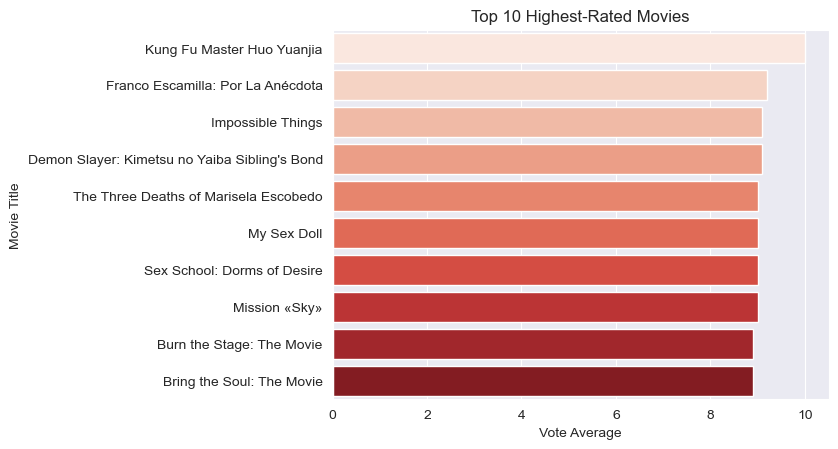

In [15]:
vote_average_by_title = df.groupby('Title')['Vote_Average'].first()

highest_ratings_df = df[df['Title'].map(vote_average_by_title) >= 8.5]

highest_ratings_df.sort_values(by='Vote_Average',ascending=False,inplace=True)

top_10_movies=highest_ratings_df.head(10)

sns.barplot(data=top_10_movies,x='Vote_Average', y='Title',palette='Reds')

plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest-Rated Movies')

plt.show()



In [16]:
df.drop(columns={'Overview','Poster_Url'},inplace=True)

## plotting the top 10 most popular movies with its corresponding genre
### spider-man:no way home is by far the most popular movie as we see from our graph not surprising knowing superheroes movies are popular these days
#### we see that action moives are present more than others 

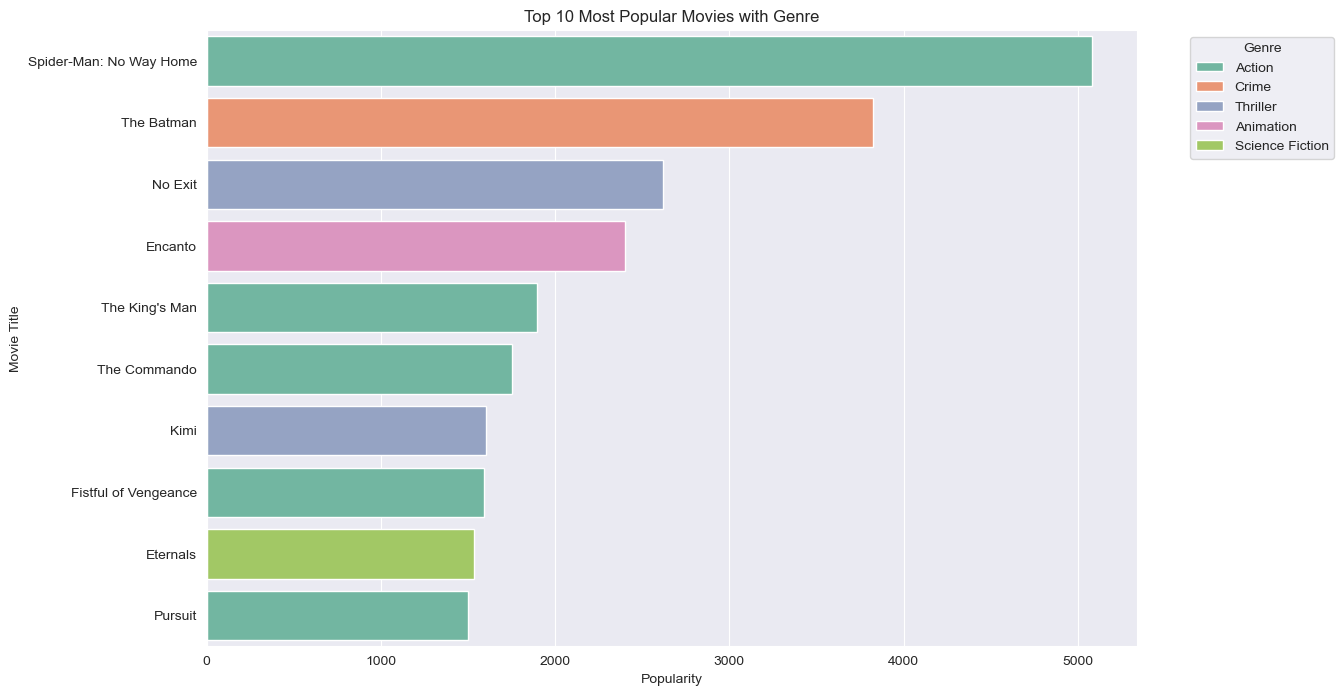

In [17]:
most_popluar_movies = df.groupby('Title')['Popularity'].first()

most_popluar_movies.sort_values(ascending=False,inplace=True)

top_10_popluar_moives=most_popluar_movies.head(10)

top_10_popular_movies_with_genre = pd.merge(top_10_popluar_moives, df[['Title', 'Genre']], on='Title',how='left')


plt.figure(figsize=(12, 8))
sns.barplot(x='Popularity', y='Title', data=top_10_popular_movies_with_genre, hue='Genre', palette='Set2', dodge=False)
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Popular Movies with Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [18]:
top_10_popular_movies_with_genre = pd.merge(top_10_popluar_moives, df[['Title', 'Genre']], on='Title',how='left')
top_10_popular_movies_with_genre

,Title,Popularity,Genre
0,Spider-Man: No Way Home,5083.954,Action
1,The Batman,3827.658,Crime
2,No Exit,2618.087,Thriller
3,Encanto,2402.201,Animation
4,The King's Man,1895.511,Action
5,The Commando,1750.484,Action
6,Kimi,1601.782,Thriller
7,Fistful of Vengeance,1594.013,Action
8,Eternals,1537.406,Science Fiction
9,Pursuit,1500.523,Action


In [19]:
df['Original_Language'] = df['Original_Language'].str.upper()

## Representation of the most common Languages in moives
### English is dominating the charts as  the most common language used in movies 
#### japanese comes in 2nd place unexpectedly above other common Languages like spanish or french 

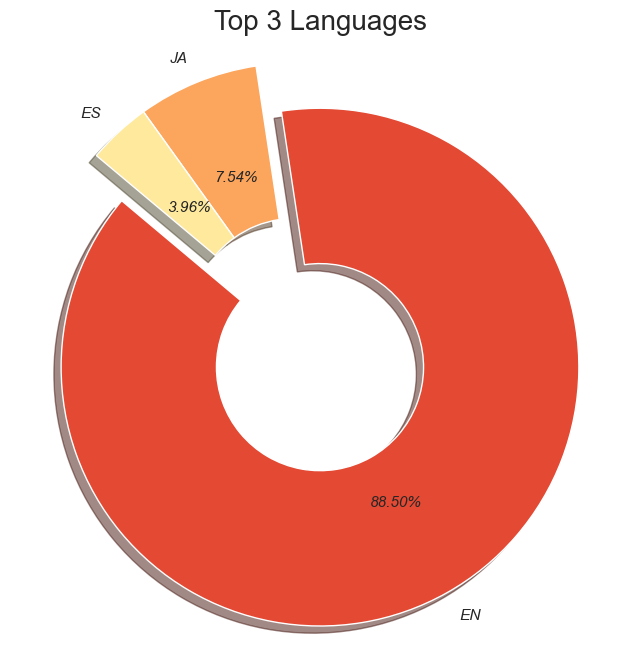

<Figure size 1800x700 with 0 Axes>

In [20]:

language_counts = df['Original_Language'].value_counts()


top_3_languages = language_counts.head(3)


plt.figure(figsize=(8, 8))  
plt.pie(top_3_languages, labels=top_3_languages.index, autopct='%1.2f%%', startangle=140,
        wedgeprops=dict(width=0.6,edgecolor='w'),shadow=True,textprops={'fontsize':11,'style':"italic"},
       explode=[0.2,0,0])
plt.title('Top 3 Languages',fontsize=20)
plt.axis('equal')
plt.figure(figsize=(18,7))
plt.show()


# Represntaion of total movies released each year
## we notice that the amount of movies that got produced were increasing each year
### the year with the most movies produced is 2021
#### there are alot of years which have 0 or only 1 movie released in it 

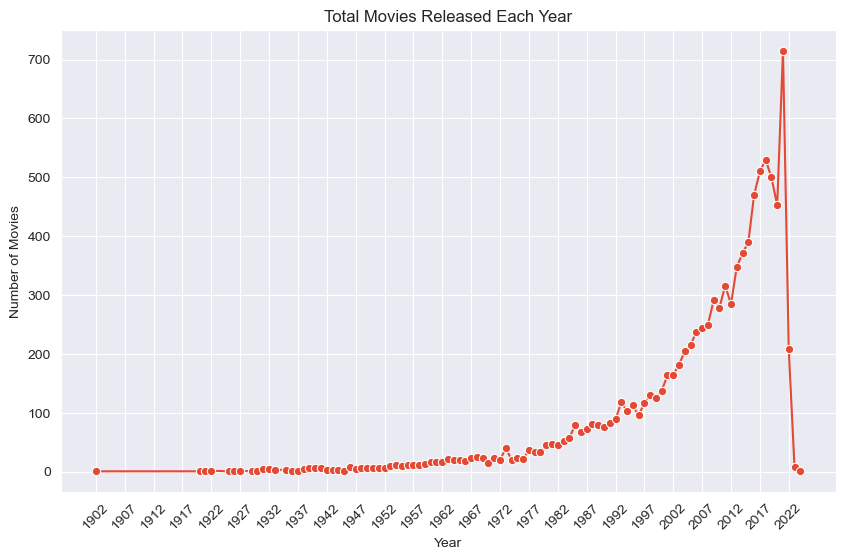

In [21]:
df['year'] = df['Release_Date'].dt.year
movies_per_year = df.groupby('year')['Title'].count().reset_index()


plt.figure(figsize=(10, 6))


sns.lineplot(data=movies_per_year, x='year', y='Title', marker='o', linestyle='-')


plt.title('Total Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')



plt.xticks(range(min(movies_per_year['year']), max(movies_per_year['year']) + 1, 5), rotation=45)


plt.show()


In [22]:
movies_per_year.sort_values(by='Title',ascending=False)
df.drop(columns={'year'},inplace=True)

# pairplot of all our numerical columns 


C:\Users\alyah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Pairplot of Movie Features')

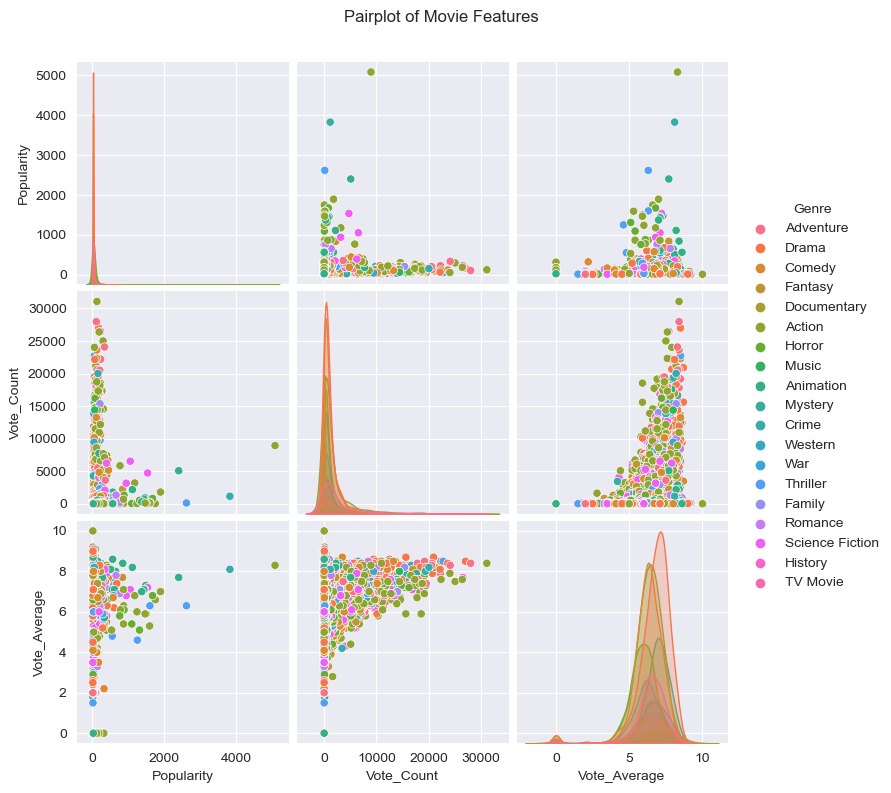

In [23]:
sns.pairplot(data=df, hue='Genre', diag_kind='kde',height=2.5)
plt.suptitle('Pairplot of Movie Features', y=1.05) 

In [24]:
df = df.drop(df[df['Vote_Average'] == 0].index)

In [25]:
if (df['Vote_Average'] == 0).any():
    print("There is at least one row with a vote average of 0.")
else:
    print("There are no rows with a vote average of 0.")

There are no rows with a vote average of 0.


C:\Users\alyah\AppData\Local\Temp\ipykernel_26276\4090598910.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Vote_Average'], shade=True)


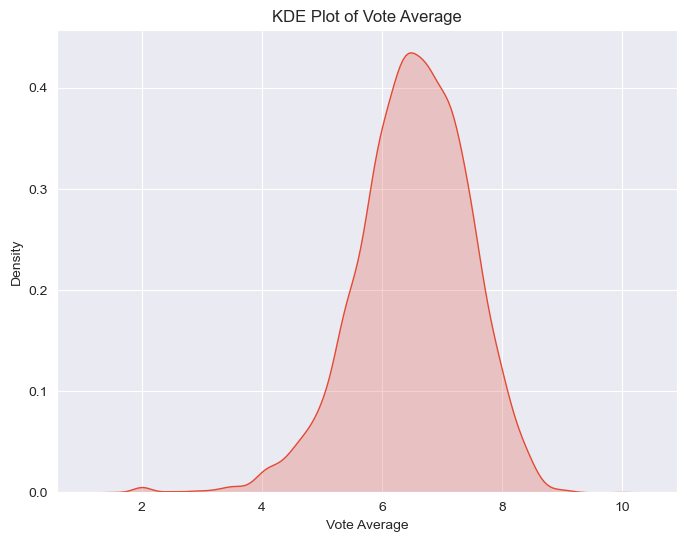

In [26]:

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['Vote_Average'], shade=True)
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.title('KDE Plot of Vote Average')
plt.show()


In [27]:
df['Vote_Average']=df['Vote_Average'].astype("category")
df['Genre']=df['Genre'].astype("category")

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
6084,1902-04-17,A Trip to the Moon,18.356,1284,8.0,FR,Adventure
6336,1920-02-27,The Cabinet of Dr. Caligari,17.858,1075,8.0,DE,Drama
7903,1921-01-01,The Phantom Carriage,15.371,213,7.9,SV,Drama
8789,1921-01-21,The Kid,14.338,1528,8.2,EN,Comedy
3219,1922-02-16,Nosferatu,28.638,1406,7.7,DE,Fantasy


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9727 entries, 6084 to 44
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9727 non-null   datetime64[ns]
 1   Title              9727 non-null   object        
 2   Popularity         9727 non-null   float64       
 3   Vote_Count         9727 non-null   int64         
 4   Vote_Average       9727 non-null   category      
 5   Original_Language  9727 non-null   object        
 6   Genre              9727 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 478.3+ KB
